<b>Image inpainting</b> là quá trình loại bỏ các hư hỏng, chẳng hạn như nhiễu, nét vẽ hoặc văn bản trên hình ảnh. Nó đặc biệt hữu ích trong việc khôi phục các bức ảnh cũ có thể bị trầy xước ở các cạnh hoặc vết mực trên đó. Tính năng vẽ trong ảnh hoạt động bằng cách thay thế các pixel bị hỏng bằng các pixel tương tự với các pixel lân cận, do đó, làm cho chúng không dễ thấy và giúp chúng hòa trộn tốt với nền.

Trong cv2.inpaint() sử dụng hai thuật toán:
<ol>
    <li>Thuật toán Telea's inpaiting: Mục tiêu chính của phương pháp này là phục hồi các vùng bị hỏng trong ảnh bằng cách lan truyền các giá trị pixel từ ranh giới của vùng đó vào bên trong. Giá trị của mỗi pixel trong vùng bị hỏng được cập nhật dựa trên công thức sau:  $I(p) = \frac{\sum _{q\epsilon \partial \Omega} W(p,q)I(q)}{\sum _{q\epsilon \partial \Omega} W(p,q)}$. 
        <br>Trong đó:<ul>
            <li>𝐼(𝑝)) là giá trị pixel cần phục hồi tại vị trí 𝑝</li>
            <li>∂Ω là biên của vùng bị hỏng</li>
            <li>I(q) là giá trị pixel tại vị trí 𝑞 trên biên</li>
            <li>W(p,q) là trọng số được tính dựa trên khoảng cách và gradient giữa 𝑝 và 𝑞. Được xác định theo công thức $W(p,q) = \frac{(1-\left \| p-q \right \|/R)(1-\left \| I(p)-I(q) \right \|/M)}{\left \| p-q \right \|}$ với $\left \| p-q \right \|$ là khoảng cách giữua p và q, $R$ là bán kính tìm kiếm và $M$ là giá trị cường độ tối đa.</li>
        </ul>
    </li>
    <li>
        Thuật toán Navier-Stokes: avier-Stokes Based Inpainting là một phương pháp phục hồi ảnh dựa trên phương trình vi phân từng phần, cụ thể là các phương trình Navier-Stokes. Phương pháp này nhằm mục đích phục hồi các vùng bị hỏng trong ảnh bằng cách lan truyền các giá trị pixel từ ranh giới của vùng đó vào bên trong vùng bị hỏng, trong khi duy trì tính liên tục và mịn màng của gradient ảnh. Công thức của phương trình là $I(p) = \int _{\partial \Omega }I(q)W(p,q)$
    </li>
</ol>


<table>
    <thead>
        <tr>
            <th><strong>Đặc điểm</strong></th>
            <th><strong>Telea's Inpainting</strong></th>
            <th><strong>Navier-Stokes Based Inpainting</strong></th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>Nguyên lý hoạt động</strong></td>
            <td>Sử dụng Fast Marching Method để lan truyền giá trị pixel từ biên vào vùng bị hỏng. Ưu tiên phục hồi các pixel gần biên trước, sau đó tiến dần vào sâu bên trong.</td>
            <td>Sử dụng phương trình Navier-Stokes để lan truyền gradient từ biên vào vùng bị hỏng. Duy trì tính liên tục và mịn màng của gradient ảnh.</td>
        </tr>
        <tr>
            <td><strong>Ưu điểm</strong></td>
            <td>Nhanh chóng và hiệu quả cho các vùng nhỏ hoặc chi tiết nhỏ bị mất. Dễ dàng sử dụng và triển khai.</td>
            <td>Hiệu quả trong việc duy trì tính liên tục của gradient và độ mịn của ảnh. Thích hợp cho các ứng dụng yêu cầu chất lượng cao.</td>
        </tr>
        <tr>
            <td><strong>Nhược điểm</strong></td>
            <td>Có thể không duy trì được độ mịn của gradient tốt như phương pháp Navier-Stokes trong các trường hợp phức tạp.</td>
            <td>Tốn nhiều thời gian tính toán hơn so với phương pháp Telea.</td>
        </tr>
        <tr>
            <td><strong>Trường hợp sử dụng</strong></td>
            <td>Các vùng nhỏ hoặc chi tiết nhỏ bị mất trong ảnh. Khi tốc độ phục hồi là ưu tiên hàng đầu.</td>
            <td>Các vùng bị hỏng lớn hoặc phức tạp. Khi yêu cầu chất lượng phục hồi cao và độ mịn của gradient.</td>
        </tr>
        <tr>
            <td><strong>Ứng dụng</strong></td>
            <td>Loại bỏ các vật thể không mong muốn khỏi ảnh. Phục hồi các vùng nhỏ bị hỏng trong ảnh số.</td>
            <td>Phục hồi ảnh cổ điển hoặc ảnh nghệ thuật bị hỏng. Loại bỏ các vật thể không mong muốn khỏi ảnh với yêu cầu chất lượng cao.</td>
        </tr>
    </tbody>
</table>

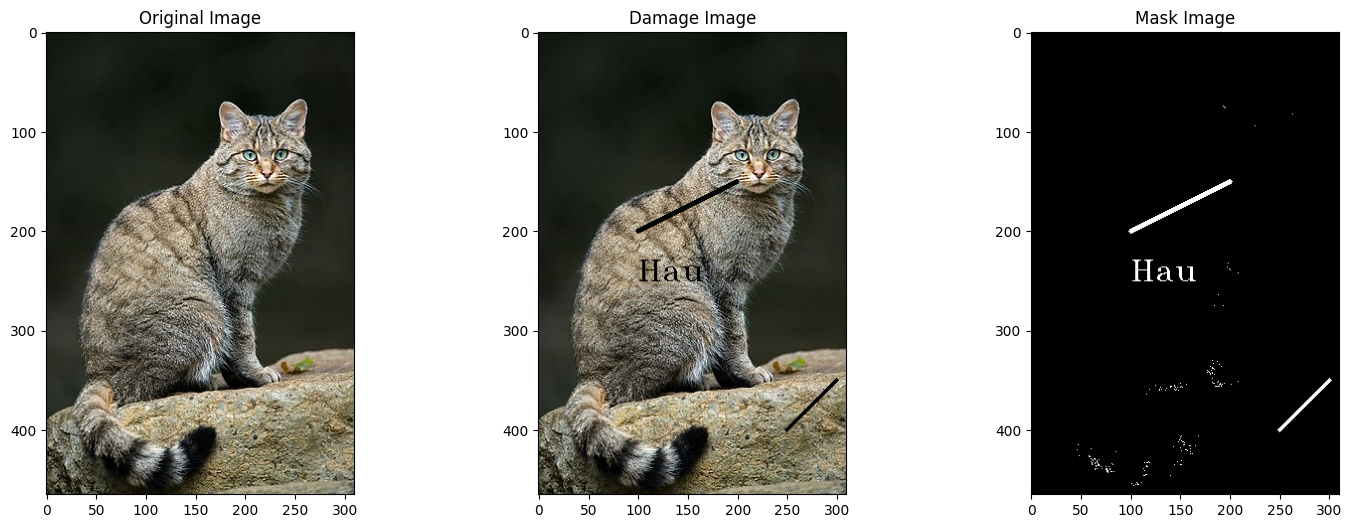

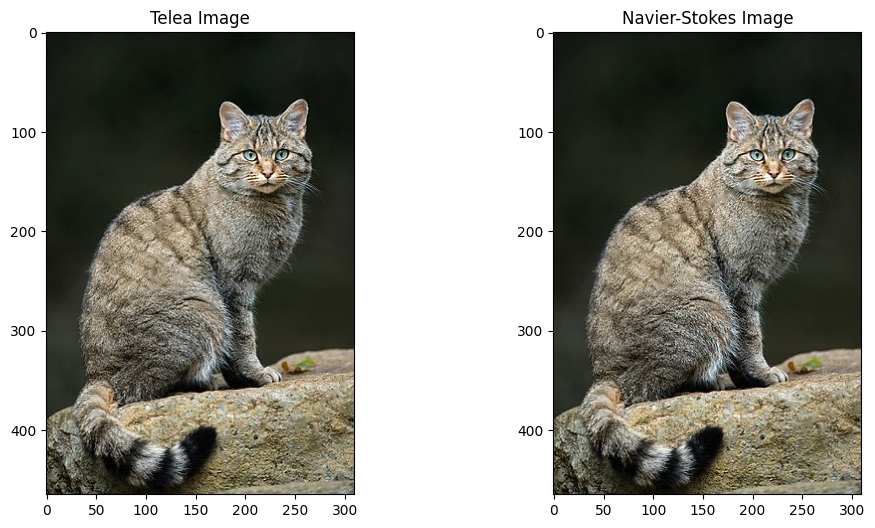

In [28]:
# cv2.inpaint(src, inpaintMask, inpaintRadius, methods)

import cv2 
import numpy as np
import matplotlib.pyplot as plt

image_original = cv2.imread('inpainting.jpg')
image_copy = image_original.copy()
cv2.line(image_copy, (100,200), (200,150), (0, 0, 0), thickness=3)
cv2.putText(image_copy, 'Hau', (100,250), fontFace = cv2.FONT_HERSHEY_TRIPLEX, fontScale = 1, color = (0,0,0))
cv2.line(image_copy, (250,400), (300,350), (0, 0, 0), thickness=3)

image_gray = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY_INV)
inpaint_telea = cv2.inpaint(image_copy, mask, 3, cv2.INPAINT_TELEA)
inpaint_ns = cv2.inpaint(image_copy, mask, 3, cv2.INPAINT_NS)

plt.figure(figsize=(18,6))
plt.subplot(131);plt.imshow(cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)); plt.title('Original Image')
plt.subplot(132);plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)); plt.title('Damage Image')
plt.subplot(133);plt.imshow(mask, cmap='gray'); plt.title('Mask Image')
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(121);plt.imshow(cv2.cvtColor(inpaint_telea, cv2.COLOR_BGR2RGB)); plt.title('Telea Image')
plt.subplot(122);plt.imshow(cv2.cvtColor(inpaint_ns, cv2.COLOR_BGR2RGB)); plt.title('Navier-Stokes Image')
plt.show()

<h4>Đánh giá các kết quả sử dụng PSNR</h4h4>

$PSNR = 10 \cdot log_{10} (\frac{MAX_{I}^{2}}{MSE})$

Thông thường nếu PSNR>=40 dB thì hệ thống mắt thường gần như không phân biệt được ảnh gốc và ảnh sinh ra. PSNR càng cao thì chất lượng ảnh sinh càng tốt, khi 2 ảnh giống hệt nhau thì MSE=0 và PSNR đi đến vô hạn, đơn vị của PSNR là Decibel.

In [30]:
def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0: 
        return float('inf')
    max_pixel = 255.0
    psnr = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr

# Tính PSNR cho từng phương pháp
psnr_telea = calculate_psnr(image_original, inpaint_telea)
psnr_ns = calculate_psnr(image_original, inpaint_ns)

print(f'PSNR (Telea): {psnr_telea:.2f}')
print(f'PSNR (Navier-Stokes): {psnr_ns:.2f}')

PSNR (Telea): 48.45
PSNR (Navier-Stokes): 48.46
